# Linear Regression


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## 2.  線性迴歸訓練資料、測試資料

80%  training data, 20%  testing data ==> 先利用此來驗證各種模型(演算法)的好壞及調好到最佳參數
之後可以利用由這個80%的訓練資料所得的模型後,拿100%資料re-train模型以得到最佳模型 (此model會更佳fit data)


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [5]:
x = np.linspace(0, 5, 50)
y = 1.2*x + 0.8 + 0.6*np.random.randn(50) # 自訂截距與斜率跟noise
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=20) #用train_test_split來做資料切割,0.2代表測試資料佔全部的20%
                                                                                          #random_state使每次拆分的資料固定，同樣的random_state會用同樣的順序打亂資料集
print(x_train)

[4.08163265 1.73469388 1.83673469 0.         2.75510204 3.36734694
 3.67346939 4.28571429 1.02040816 0.30612245 4.18367347 1.32653061
 4.69387755 0.20408163 3.87755102 3.97959184 0.51020408 4.3877551
 3.7755102  3.06122449 0.6122449  2.95918367 1.63265306 1.93877551
 5.         4.48979592 2.14285714 3.26530612 3.46938776 0.71428571
 2.24489796 1.12244898 2.04081633 0.91836735 4.89795918 2.85714286
 3.16326531 1.53061224 2.65306122 3.57142857]


In [7]:
y

array([1.52504126, 0.92055967, 1.01724222, 1.16476686, 1.84682188,
       2.32269853, 1.96402841, 2.09009764, 1.99222689, 2.16676901,
       2.37163691, 2.07957035, 1.74679868, 2.51331118, 2.59731821,
       2.71453642, 1.99536993, 3.33132912, 3.22961519, 2.88103258,
       3.42248222, 3.02894481, 3.8283442 , 2.58059161, 3.58153738,
       2.31528064, 3.91018462, 3.72222275, 3.5435225 , 4.74253644,
       3.76153172, 4.17931122, 5.2180724 , 4.57549482, 4.3875367 ,
       6.25438413, 5.01228722, 5.92669   , 6.63469183, 6.16484365,
       6.06702848, 4.26749777, 4.45106477, 5.1208662 , 5.30875415,
       6.88774856, 6.72594928, 6.58121108, 7.81939443, 6.65619085])

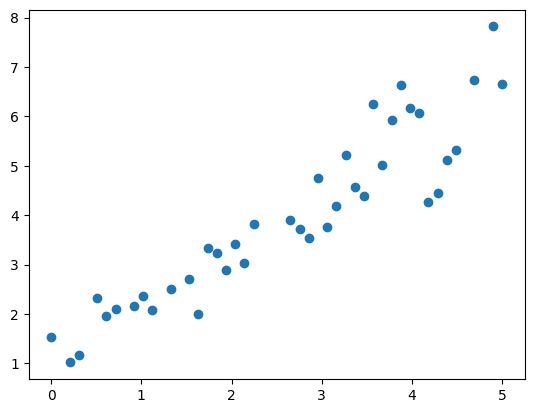

In [9]:
plt.scatter(x_train, y_train)
plt.show()

#### 用訓練資料來 fit 函數

記得現在我們只用 80% 的資料去訓練。

In [13]:
regr = LinearRegression()
X_train = x_train.reshape(-1,1) #2維
regr.fit(X_train,y_train) #訓練資料
print('Coefficients: ', regr.coef_) #斜率
print('interception: ', regr.intercept_) #截距

Coefficients:  [1.10051087]
interception:  1.0832327756220357


In [19]:
Y_train = regr.predict(X_train)

In [21]:
mse = np.sum((Y_train-y_train)**2) / len(y_train) #mse公式:將預測的答案減去實際的y後平方，加總之後再除以總資料筆數
print(mse)

0.3929498366074236


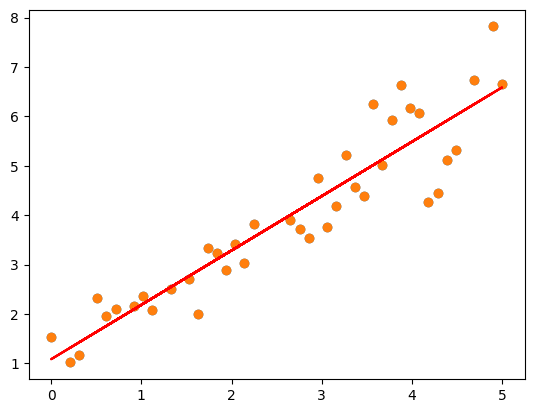

In [25]:
plt.scatter(x_train, y_train)
plt.plot(x_train, Y_train, 'r')
plt.show()
#原始的散布圖跟預測出來的線

#### test with test data

In [27]:
#套件作法
X_test = x_test.reshape(-1,1)
Y_test = regr.predict(X_test)

print(Y_test) #預測的答案

[2.4307971  2.65539116 1.53242088 1.98160899 6.136599   1.1955298
 3.89065845 3.77836143 6.36119305 3.6660644 ]


$$\widehat{y}=xw+b=w_{1}x_{1}+b$$

In [29]:
#Y=WX+b 得到斜率與截距之後的作法也能得到預測的結果
W=regr.coef_
b=regr.intercept_
W*X_test+b


array([[2.4307971 ],
       [2.65539116],
       [1.53242088],
       [1.98160899],
       [6.136599  ],
       [1.1955298 ],
       [3.89065845],
       [3.77836143],
       [6.36119305],
       [3.6660644 ]])

In [33]:
mse = np.sum((Y_test-y_test)**2) / len(y_test) # mse越小越好，因為是計算誤差
print(mse)

0.4957235335928031


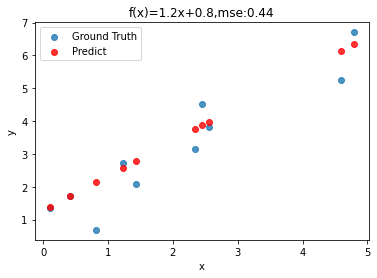

In [25]:
title='f(x)=1.2x+0.8'+',mse:'+str(round(mse,2))
plt.title(title)
plt.xlabel('x')
plt.ylabel('y')
#plt.grid(True)
plt.scatter(x_test, y_test,alpha=0.8,label='Ground Truth')
plt.scatter(x_test, Y_test, c='r', alpha=0.8,label='Predict')
plt.legend()